# Projects -Optimizing Retail Banking Strategies Through RFM-Based Customer Segmentation

## 05 – RFM Scoring and Customer Segmentation

In this step, we transform the RFM features into **RFM scores** to classify customers based on their behavior.

### 📌 Objectives
- Assign a score from **1 (worst)** to **5 (best)** for each RFM metric:
  - **Recency**: lower is better
  - **Frequency**: higher is better
  - **Monetary**: higher is better
- Create an **RFM score combination** (e.g. '554', '312')
- Map customers into **behavioral segments** (e.g. Loyal, At Risk, New)

**Import libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [27]:
rfm = pd.read_csv('outputs/rfm_table.csv')

In [29]:
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary
0,0,C1010011,26,2,5106.0
1,1,C1010012,69,1,1499.0
2,2,C1010014,76,2,1455.0
3,3,C1010018,37,1,30.0
4,4,C1010024,65,1,5000.0


In [45]:
# Recency: lower is better
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])

# Frequency & Monetary: higher is better
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=[1,2,3,4])

In [65]:
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_group
0,0,C1010011,26,2,5106.0,4,4,4,12,444
1,1,C1010012,69,1,1499.0,2,1,3,6,213
2,2,C1010014,76,2,1455.0,1,4,3,8,143
3,3,C1010018,37,1,30.0,4,1,1,6,411
4,4,C1010024,65,1,5000.0,2,1,4,7,214


In [55]:
# Create a RFM total or score
rfm['RFM_score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

In [61]:
rfm['RFM_group'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [67]:
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_group
0,0,C1010011,26,2,5106.0,4,4,4,12,444
1,1,C1010012,69,1,1499.0,2,1,3,6,213
2,2,C1010014,76,2,1455.0,1,4,3,8,143
3,3,C1010018,37,1,30.0,4,1,1,6,411
4,4,C1010024,65,1,5000.0,2,1,4,7,214


<Axes: xlabel='RFM_score', ylabel='count'>

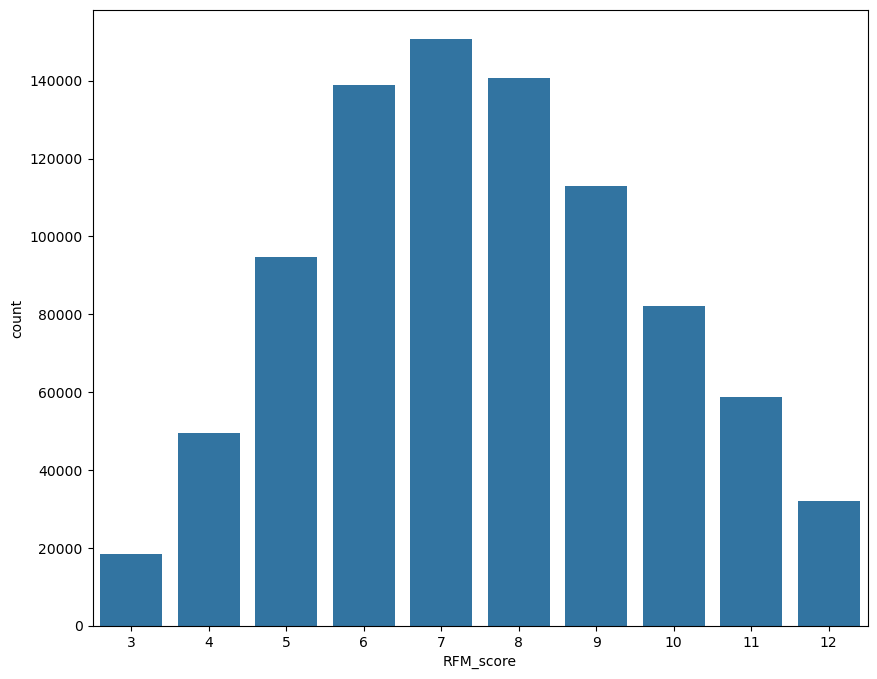

In [132]:
# visualise RFM score
plt.figure(figsize = (10, 8))
sns.countplot(x = rfm['RFM_score'])

**classify customers**

**12 - 10** for high valued customers<br>
**9 - 6** for medium customers<br>
**5 - 3** for low valued customers

In [73]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [97]:
rfm['Segments'] = rfm['RFM_score'].apply(lambda x: assign_segments(x))

In [99]:
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_group,Segments
0,0,C1010011,26,2,5106.0,4,4,4,12,444,high
1,1,C1010012,69,1,1499.0,2,1,3,6,213,medium
2,2,C1010014,76,2,1455.0,1,4,3,8,143,medium
3,3,C1010018,37,1,30.0,4,1,1,6,411,medium
4,4,C1010024,65,1,5000.0,2,1,4,7,214,medium


<Axes: xlabel='Segments', ylabel='count'>

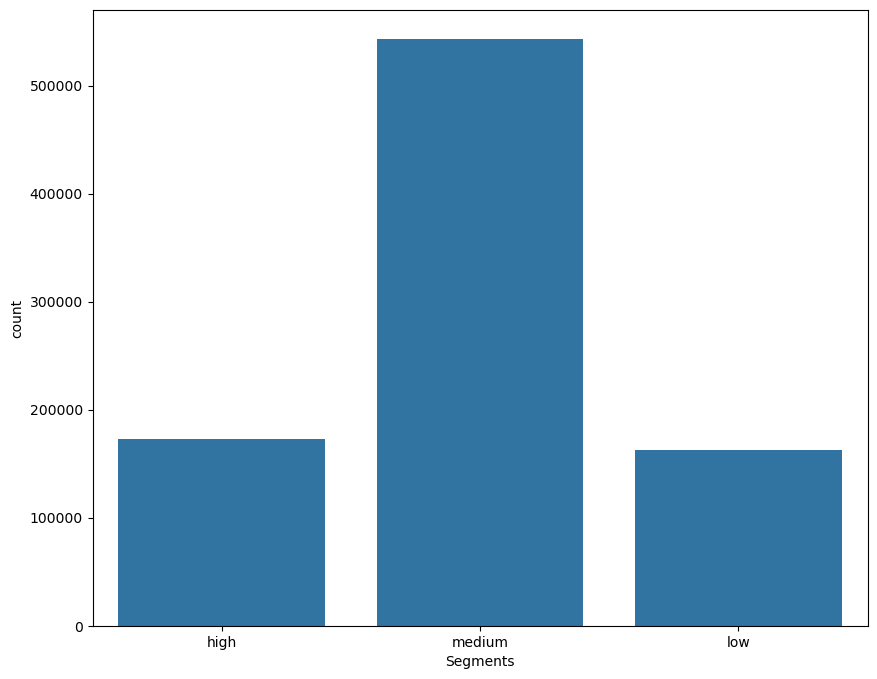

In [103]:
# visualise RFM segments
plt.figure(figsize = (10, 8))
sns.countplot(x = rfm['Segments'])

**Create weighted RFM score**

In [116]:
rfm['Weighted_rfm_score'] = (rfm['R_score'].astype(int) * 2) + (rfm['F_score'].astype(int) * 1) + (rfm['M_score'].astype(int) * 1)

In [122]:
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_group,Segments,Weighted_rfm_score
0,0,C1010011,26,2,5106.0,4,4,4,12,444,high,16
1,1,C1010012,69,1,1499.0,2,1,3,6,213,medium,8
2,2,C1010014,76,2,1455.0,1,4,3,8,143,medium,9
3,3,C1010018,37,1,30.0,4,1,1,6,411,medium,10
4,4,C1010024,65,1,5000.0,2,1,4,7,214,medium,9


<Axes: xlabel='Weighted_rfm_score', ylabel='count'>

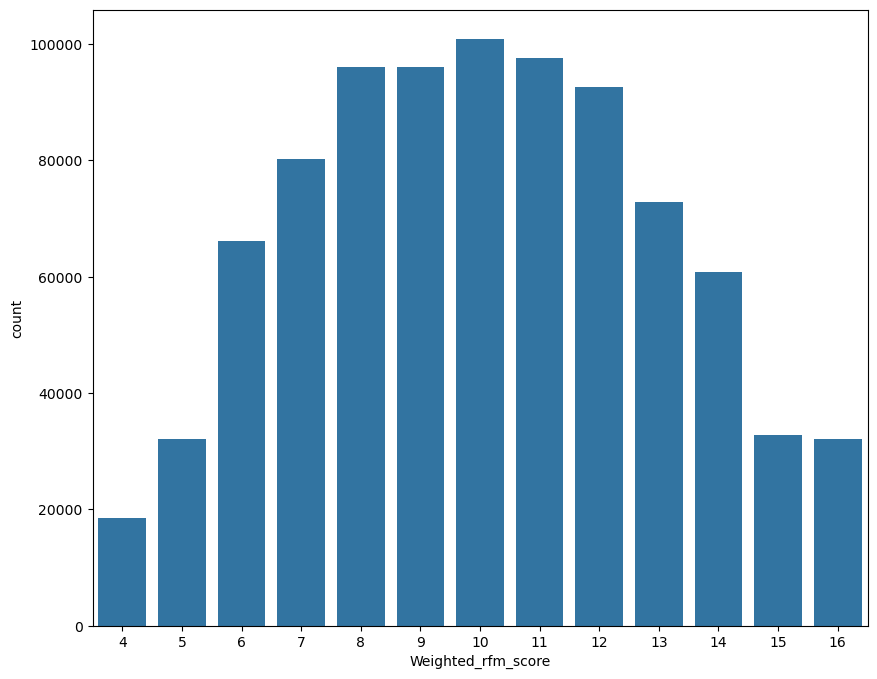

In [124]:
# visualise weighted RFM score
plt.figure(figsize = (10, 8))
sns.countplot(x = rfm['Weighted_rfm_score'])

In [126]:
rfm['Weighted_segments'] = rfm['Weighted_rfm_score'].apply(lambda x: assign_segments(x))

In [128]:
rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_group,Segments,Weighted_rfm_score,Weighted_segments
0,0,C1010011,26,2,5106.0,4,4,4,12,444,high,16,high
1,1,C1010012,69,1,1499.0,2,1,3,6,213,medium,8,medium
2,2,C1010014,76,2,1455.0,1,4,3,8,143,medium,9,medium
3,3,C1010018,37,1,30.0,4,1,1,6,411,medium,10,high
4,4,C1010024,65,1,5000.0,2,1,4,7,214,medium,9,medium


<Axes: xlabel='Weighted_segments', ylabel='count'>

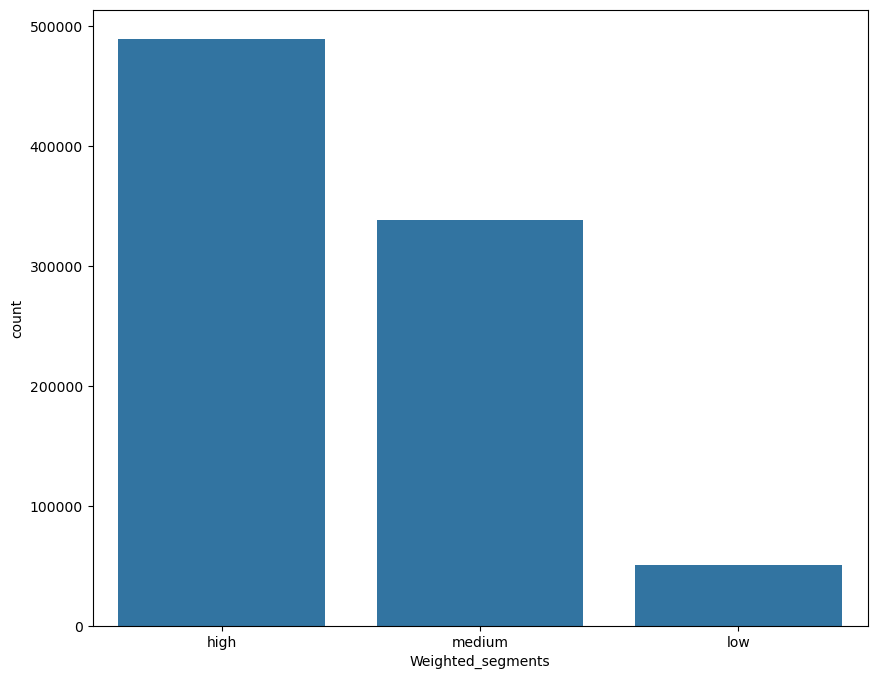

In [130]:
# visualise Weighted_segments
plt.figure(figsize = (10, 8))
sns.countplot(x = rfm['Weighted_segments'])

In [137]:
rfm.to_csv('outputs/rfm_table2.csv')

In [ ]:
# customers into segments based on R+F scores:
def segment_customer(row):
    r, f = int(row['R_score']), int(row['F_score'])
    if r >= 4 and f >= 4:
        return 'Loyal'
    elif r >= 4 and f <= 2:
        return 'New'
    elif r <= 2 and f >= 4:
        return 'At Risk'
    elif r <= 2 and f <= 2:
        return 'Lost'
    else:
        return 'Regular'

rfm['Segment (R+F)'] = rfm.apply(segment_customer, axis=1)